INMERSIÓN DE DATOS CON PYTHON (ALURA LATAM)

El presente trabajo fue desarrollado en el mes de febrero de 2024 en el marco de la "Inmersión de datos con Python" organizada por ALURA LATAM.

El objetivo del evento fue adentrarse en el mundo de Python y Ciencia de Datos a través del análisis de riesgo crediticio para un banco utilizando modelos de Machine Learning.

El proyecto estuvo coordinado por Álvaro Camacho, Christian Velasco y Alejandro Gamarra.

In [189]:
import pandas as pd #Paquetes con alias
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

drive.mount("/content/Drive") #Conectar cuaderno con drive
warnings.filterwarnings("ignore") #Ignorar warnings


Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [190]:
pd.set_option("display.max_columns",None) #set_option sirve para ver todas las columnas del dataset
global df_banco, resultados #Global sirve para usar esas variables en cualquier parte del codigo

In [191]:
#Viusualizacion de los primeras filas del dataset
df_banco=pd.read_csv("/content/Drive/MyDrive/german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [192]:
#Cantidad de filas y columnas
df_banco.shape

(1000, 21)

In [193]:
#Explorar nombre de las columnas
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [194]:
#Mas exploracion del dataset
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [195]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [196]:
#Contar los valores de cada categoria de la columna 'account_check_status'
df_banco.account_check_status.value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [197]:
#Explorar categorias

columnas = list(df_banco.select_dtypes(include=["object"]).columns) #Obtener columnas de datos de tipo 'objeto'
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index)) #Creamos lista para cada una de las columnas
  print('\n') #new line antes de la siguiente impresión para facilitar lectura

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [198]:
#Creamos un diccionario para cambiar las categorias a numéricas
dic={"yes":1,"no":0}
df_banco["foreign_worker"]=df_banco["foreign_worker"].map(dic) #Uso metodo "map", asigno el valor a la llave
df_banco["foreign_worker"] #Visualizo para chequear aplicacion

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [199]:
#Preparación y limpieza de la base para procesamiento
def procesar_datos(): #Creacion de funcion. Construccion de diccionario
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco #Eliminar duplicados
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco #Eliminar nulos



  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)


In [200]:
procesar_datos()
df_banco.sample(6) #Corroborar aplicacion de los cambios

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
545,1,1,24,4,1,1333,5,5,4,3,1,2,1,43,3,3,2,3,2,0,1
670,0,4,24,5,10,4139,4,3,3,3,1,3,2,27,3,2,2,2,1,1,1
537,0,2,18,5,4,3612,5,1,3,2,1,4,2,37,3,2,1,3,1,1,1
85,0,4,12,5,10,1412,5,3,4,2,3,2,1,29,3,2,2,4,1,1,1
369,0,2,18,3,4,3001,5,2,2,2,1,4,1,40,3,1,1,3,1,0,1
263,0,4,12,5,8,2748,5,1,2,2,1,4,4,57,1,3,3,2,1,0,1


In [201]:
#Transformar variables a discretas
variables_discretas=["personal_status_sex", "age", "duration_in_month",
                     "credit_amount","default"]
df_banco[variables_discretas].tail(6)

,personal_status_sex,age,duration_in_month,credit_amount,default
994,3,50,12,2390,0
995,2,31,12,1736,0
996,1,40,30,3857,0
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


El feature engineering es el proceso mediante el cual seleccionamos, transformamos y creamos atributos a partir de los datos del dataset para mejorar el rendimiento de los modelos de machine learning que queremos implementar.

In [202]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'], #Establecer tangos de valores por bins
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])





In [203]:
#Corroborar los cambios realizados
feature_engineering()
df_banco.head(6)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5
5,0,4,3,8,1,3,2,1,4,4,3,3,1,2,2,1,1,0,1,2,3,10


In [204]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


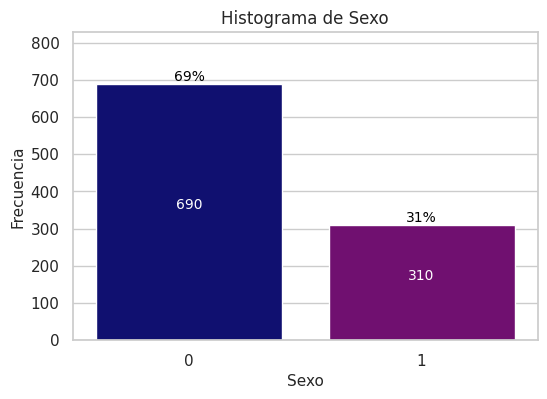

In [205]:
#Grafico de barras para representar la variable sexo
sns.set(style="whitegrid")

colors = sns.color_palette(['navy', 'purple'])
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_banco, x='sexo', palette=colors)
plt.title('Histograma de Sexo', fontsize=12)
plt.xlabel('Sexo', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)

total_observaciones = len(df_banco) #Calcular observaciones
for p in ax.patches: #Bucle
    x_pos = p.get_x() + p.get_width() / 2.
    y_pos_abs = p.get_height() / 2 + p.get_y()  # Para centrar absolutos :)
    y_pos_prop = p.get_height() / total_observaciones + p.get_y()  # Para centrar proporciones :)
    ax.annotate(f'{p.get_height():.0f}', (x_pos, y_pos_abs), #Mostrar absoluto de observaciones
                ha='center', va='center', fontsize=10, color='white', xytext=(0, 5),
                textcoords='offset points')
    porcentaje = p.get_height() / total_observaciones * 100
    ax.annotate(f'{int(porcentaje)}%', (x_pos, p.get_height()), #Mostrar porcentajes
                ha='center', va='bottom', fontsize=10, color='black')

plt.ylim(0, df_banco['sexo'].value_counts().max() * 1.2)  #Ajustar la escala del eje y
plt.show()


In [206]:
#Más graficos para explorar los datos
def analisis_exploratorio():
    global df_banco
    histogramas = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']
    lista_histogramas = list(enumerate(histogramas))

    # Ajustar espacio entre subgráficos
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.5)  # Ajustar espacio vertical subgráficos

    plt.title('Histogramas')
    for i in lista_histogramas:
        plt.subplot(3, 2, i[0] + 1)
        ax = sns.countplot(x=i[1], data=df_banco, color="pink", linewidth=1)
        plt.xlabel(i[1], fontsize=18)
        plt.ylabel('Total', fontsize=18)

        # Ajustar la escala del eje y
        ax.set_ylim(0, df_banco[i[1]].value_counts().max() * 1.1)  #Aumentar el límite superior en un 10%

    plt.show()


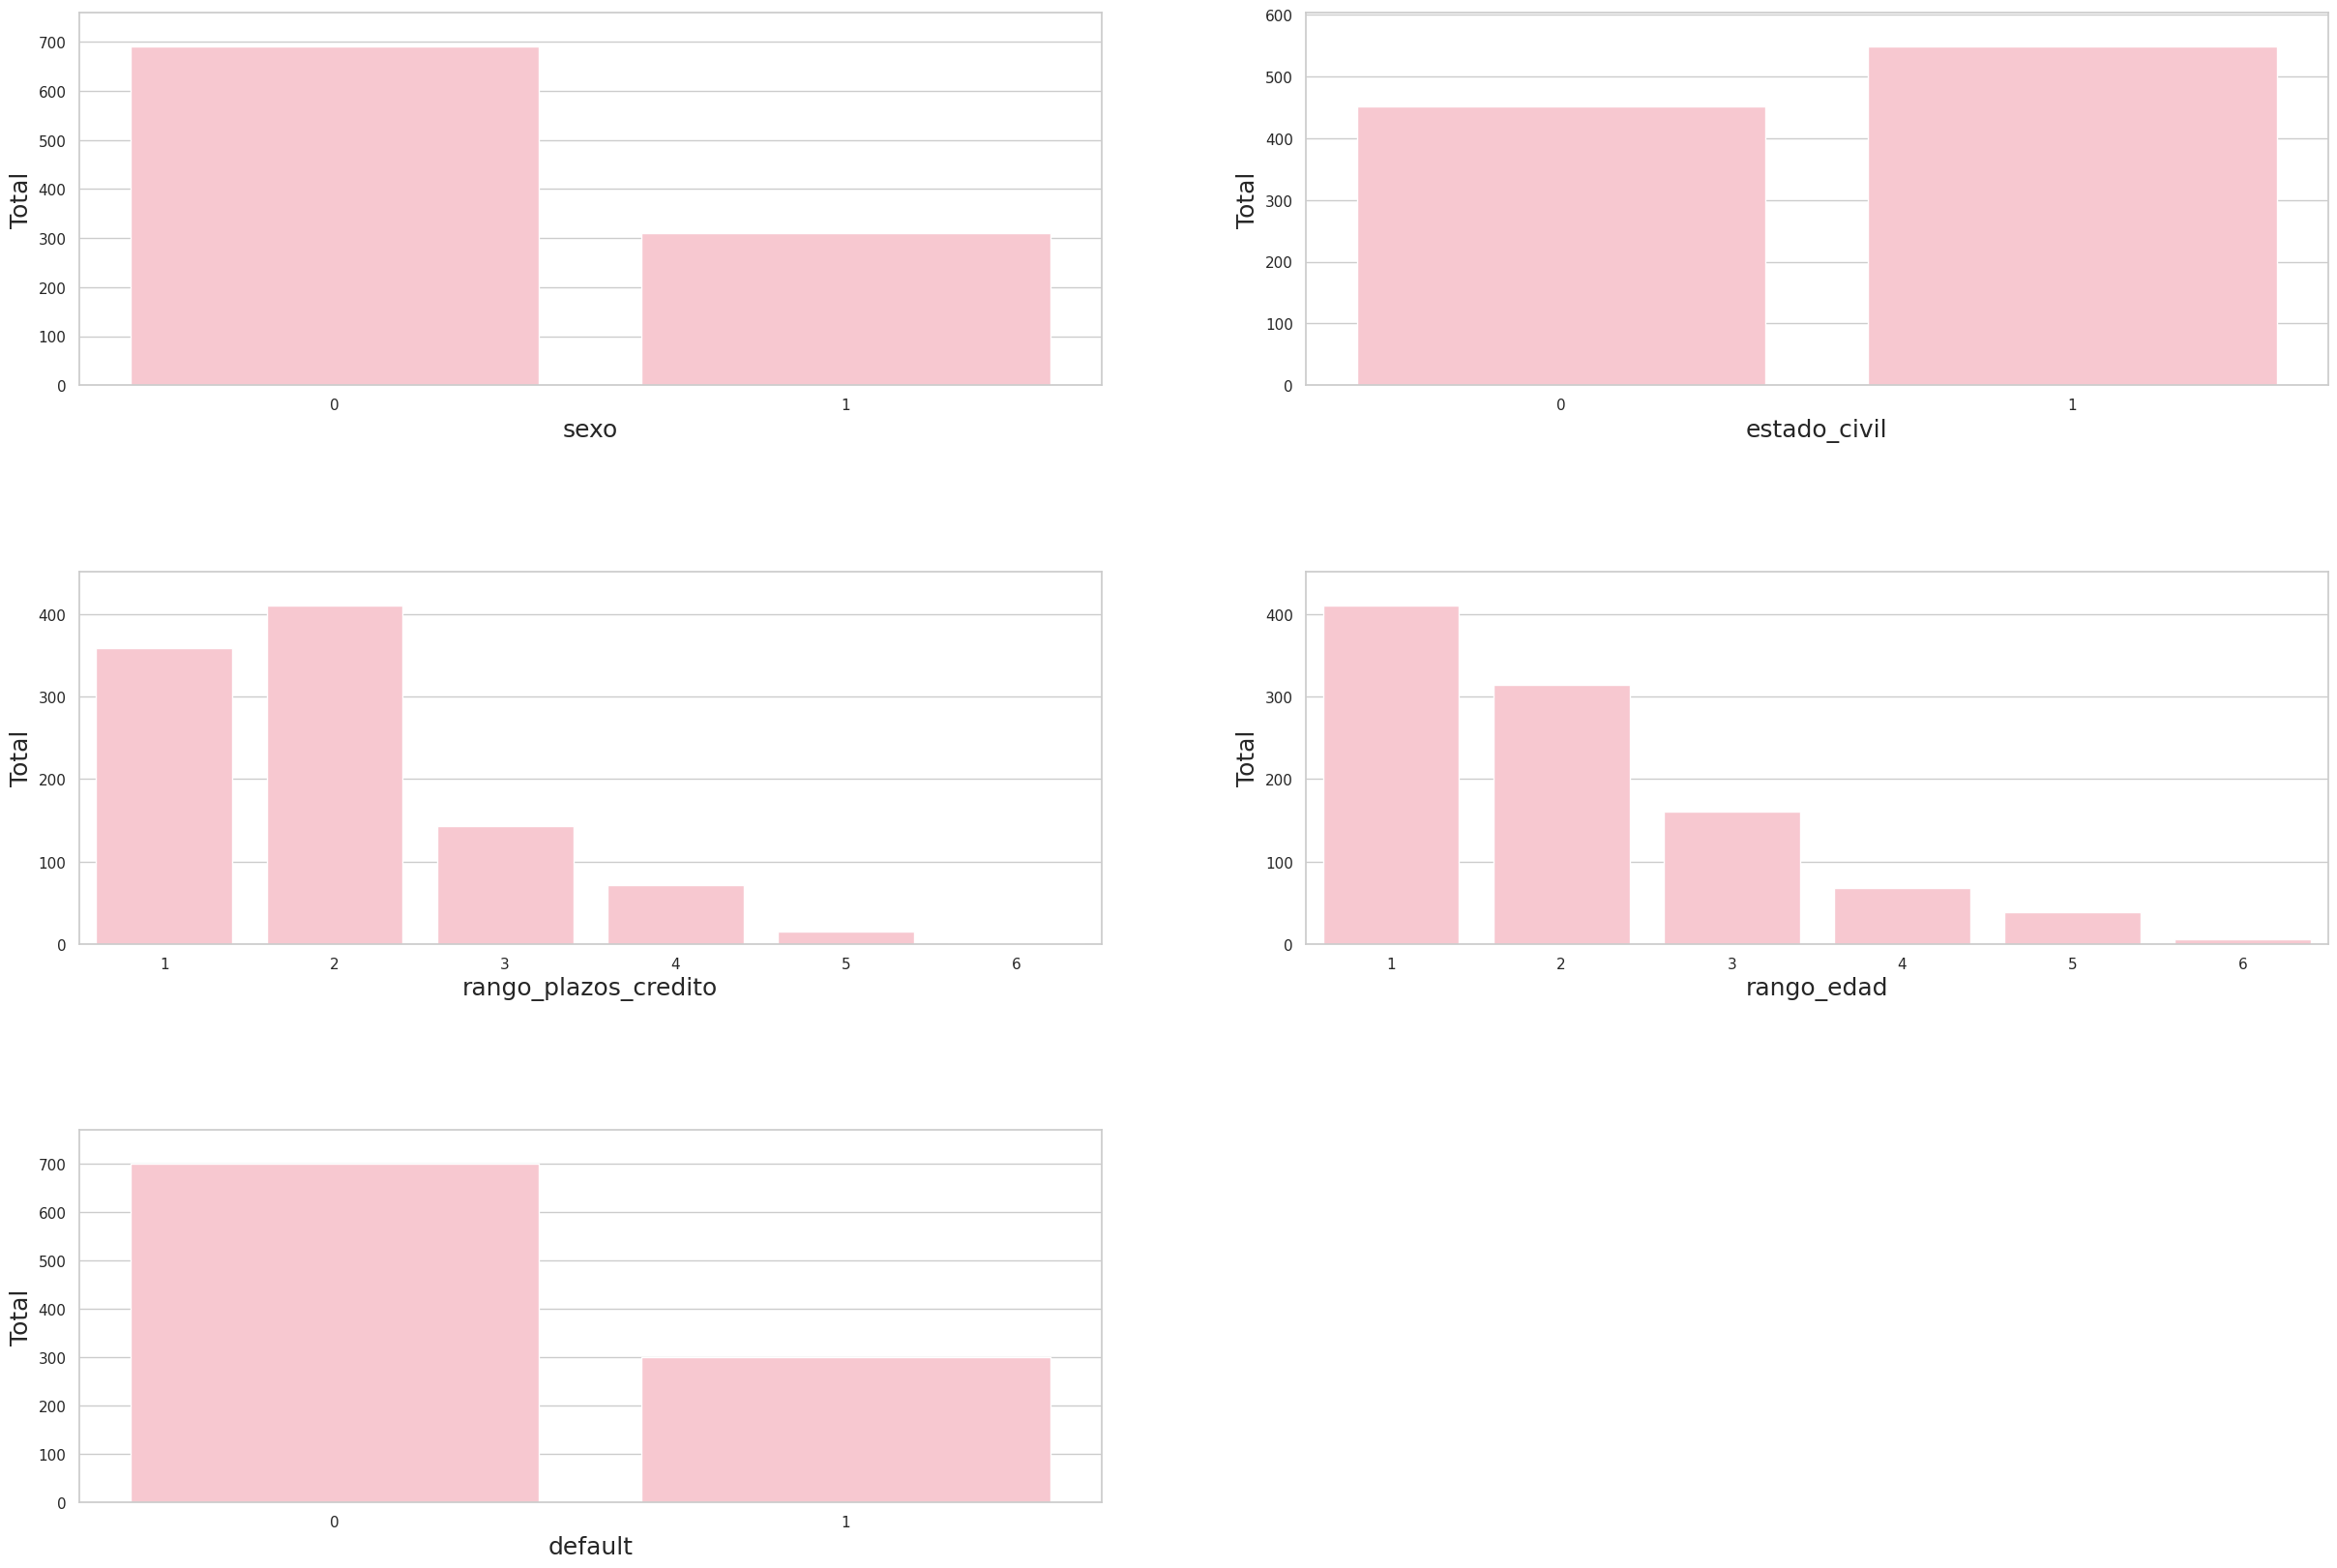

In [207]:
analisis_exploratorio()


# DESAFIOS

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.

2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.

3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones.


In [208]:
df_banco.rango_edad.value_counts()

1    411
2    315
3    161
4     68
5     39
6      6
Name: rango_edad, dtype: int64

In [209]:
#Unificar en 4 las categorias de edad 5 y 6

def agrupar_edad(valor):
    if valor >= 4:
        return 4
    else:
        return valor


df_banco["rango_edad"]=df_banco["rango_edad"].apply(lambda x: agrupar_edad(x))

df_banco.rango_edad.value_counts()

1    411
2    315
3    161
4    113
Name: rango_edad, dtype: int64

In [210]:
#agrupar los rangos de plazo y credito.
def agrupar_rango_credito(valor):
    if valor >= 4:
        return 4
    else:
        return valor


df_banco["rango_plazos_credito"]=df_banco["rango_plazos_credito"].apply(lambda x: agrupar_rango_credito(x))
df_banco.rango_plazos_credito.value_counts()

2    411
1    359
3    143
4     87
Name: rango_plazos_credito, dtype: int64

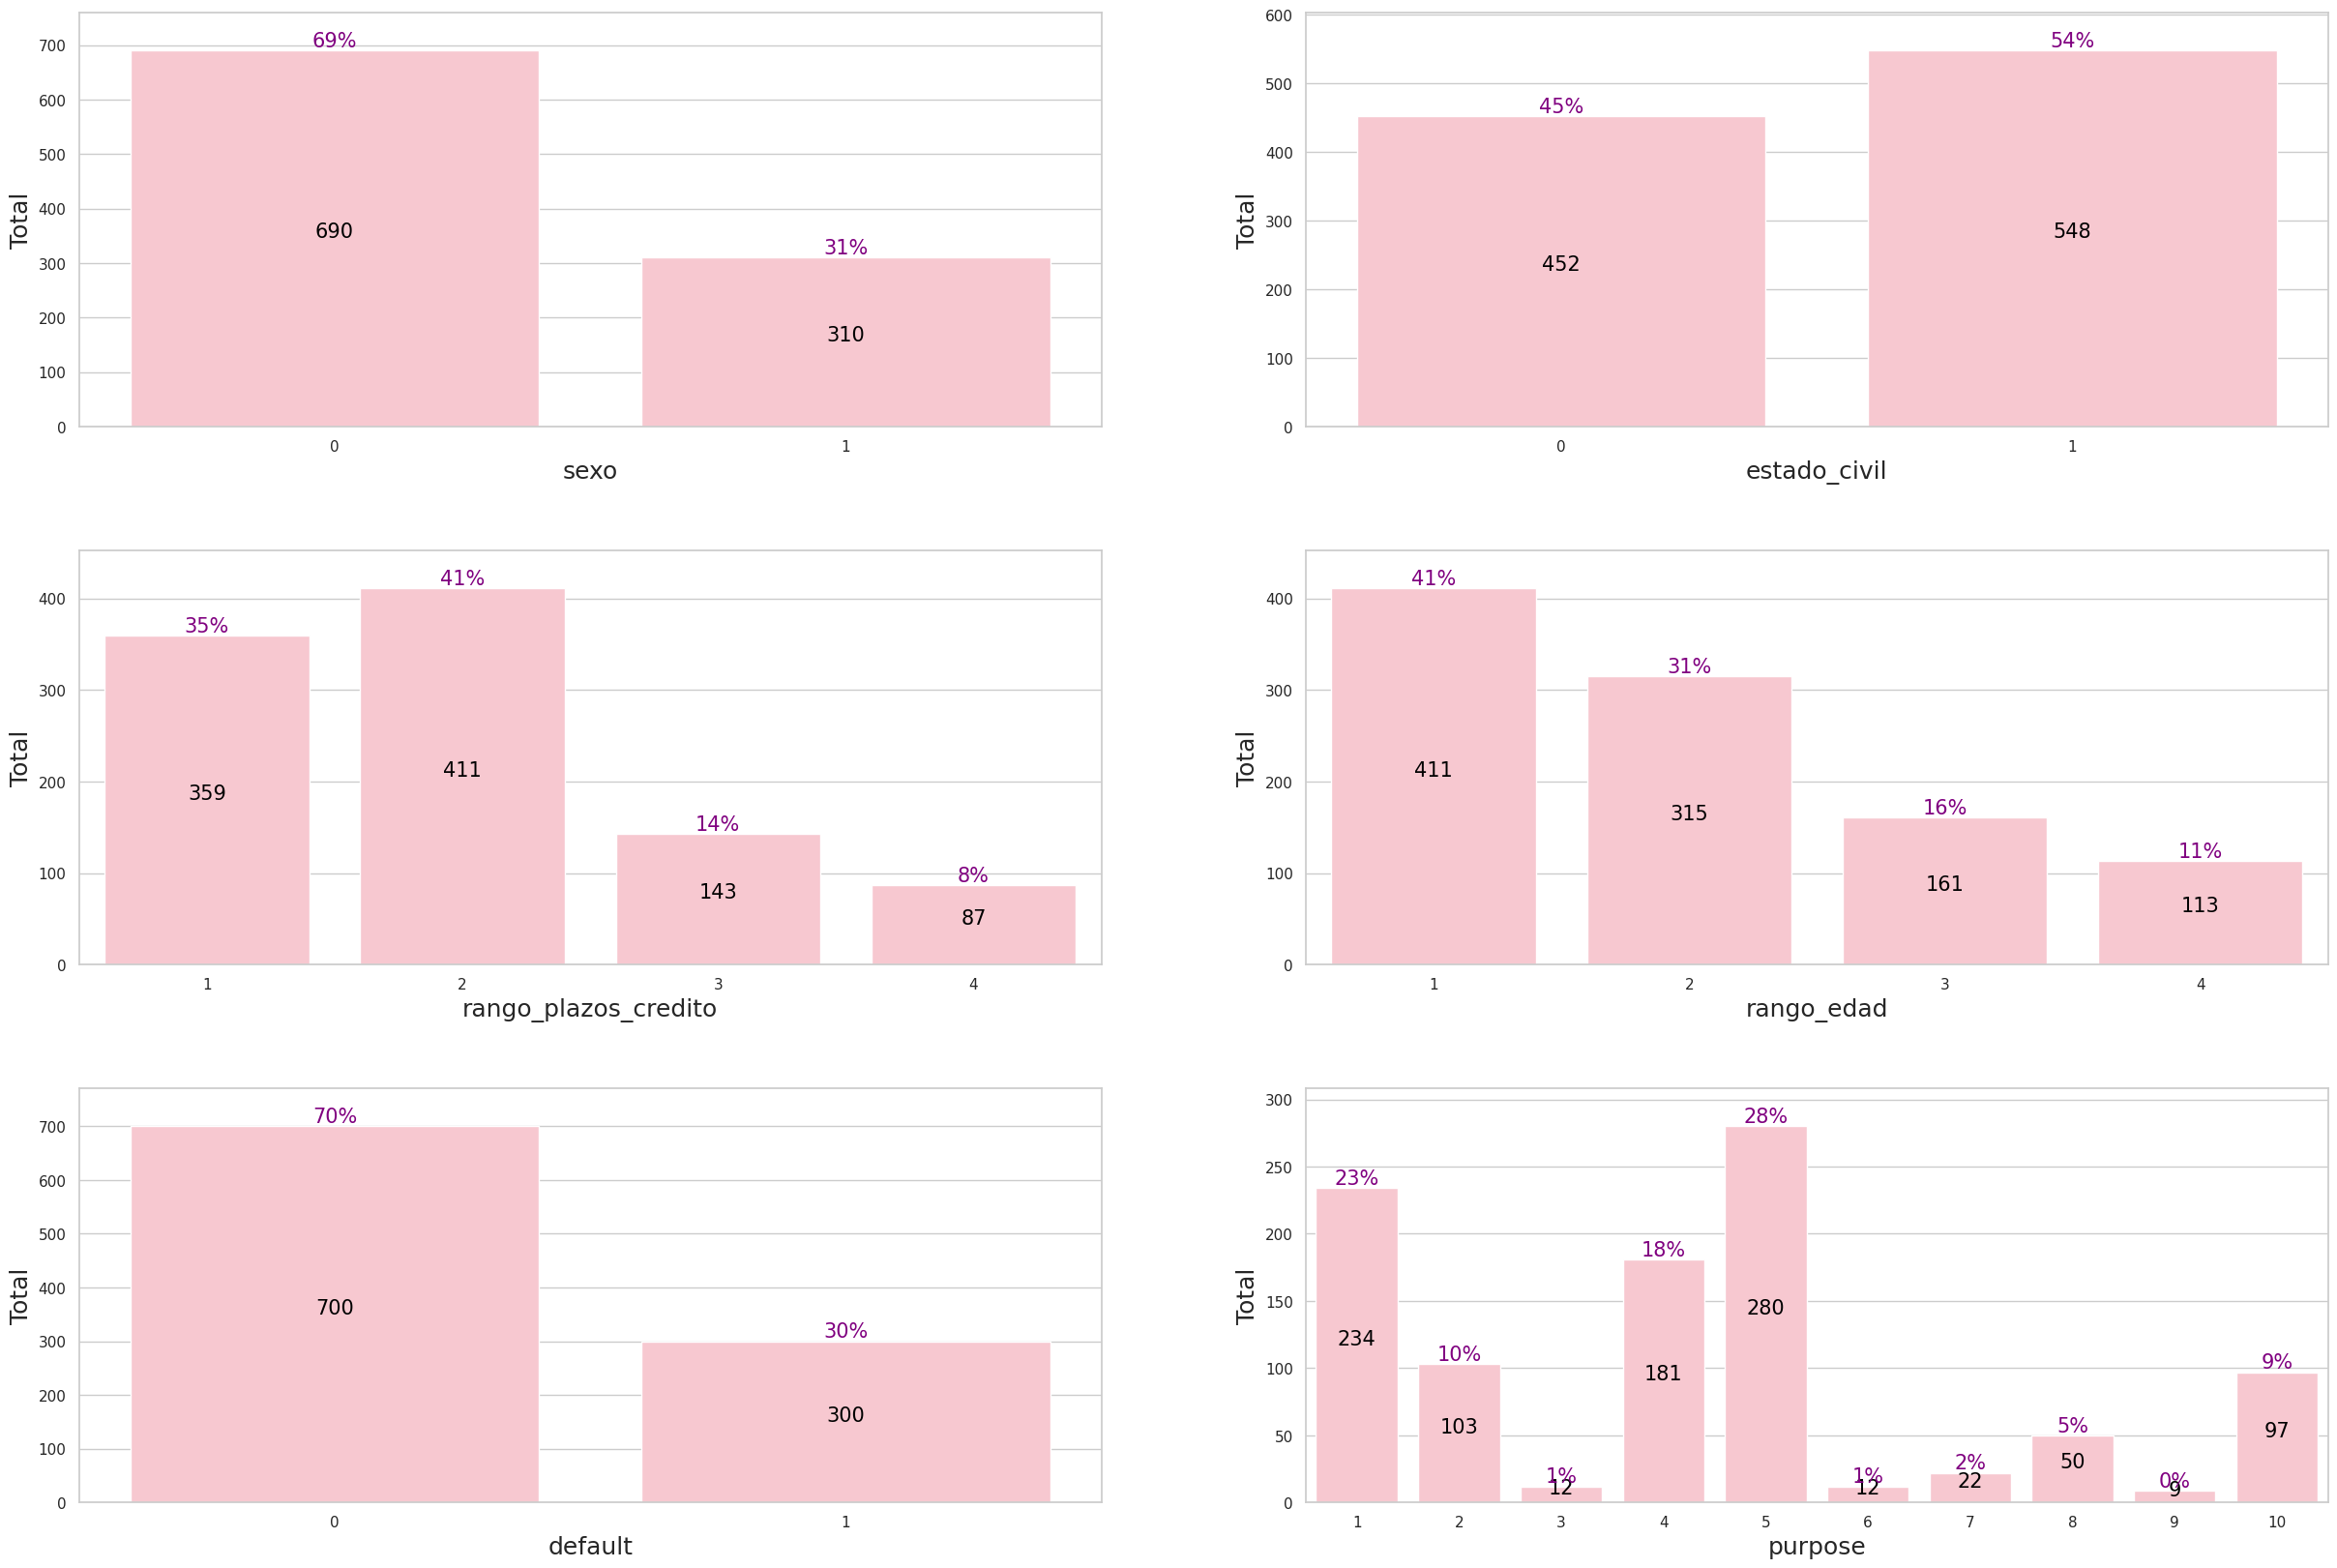

In [211]:
def analisis_exploratorio():
    global df_banco
    histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default','purpose']
    lista_histogramas = list(enumerate(histogramas))
    plt.figure(figsize=(30,20))
    plt.subplots_adjust(hspace=0.3)
    plt.title('Histogramas')
    for i in lista_histogramas:
        plt.subplot(3, 2, i[0]+1)
        ax = sns.countplot(x=i[1], data=df_banco,color="pink")
        plt.xlabel(i[1], fontsize=18)
        plt.ylabel('Total', fontsize=18)
        total_observaciones = len(df_banco)
        for p in ax.patches:
            x_pos = p.get_x() + p.get_width() / 2.
            y_pos_abs = p.get_height() / 2 + p.get_y()  # Para centrar absolutos :)
            y_pos_prop = p.get_height() / total_observaciones + p.get_y()  # Para centrar proporciones :)
            ax.annotate(f'{p.get_height():.0f}', (x_pos, y_pos_abs),
                        ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                        textcoords='offset points')
            porcentaje = p.get_height() / total_observaciones * 100
            ax.annotate(f'{int(porcentaje)}%', (x_pos, p.get_height()),
                        ha='center', va='bottom', fontsize=15, color='purple')

            ax.set_ylim(0, df_banco[i[1]].value_counts().max() * 1.1)

analisis_exploratorio()

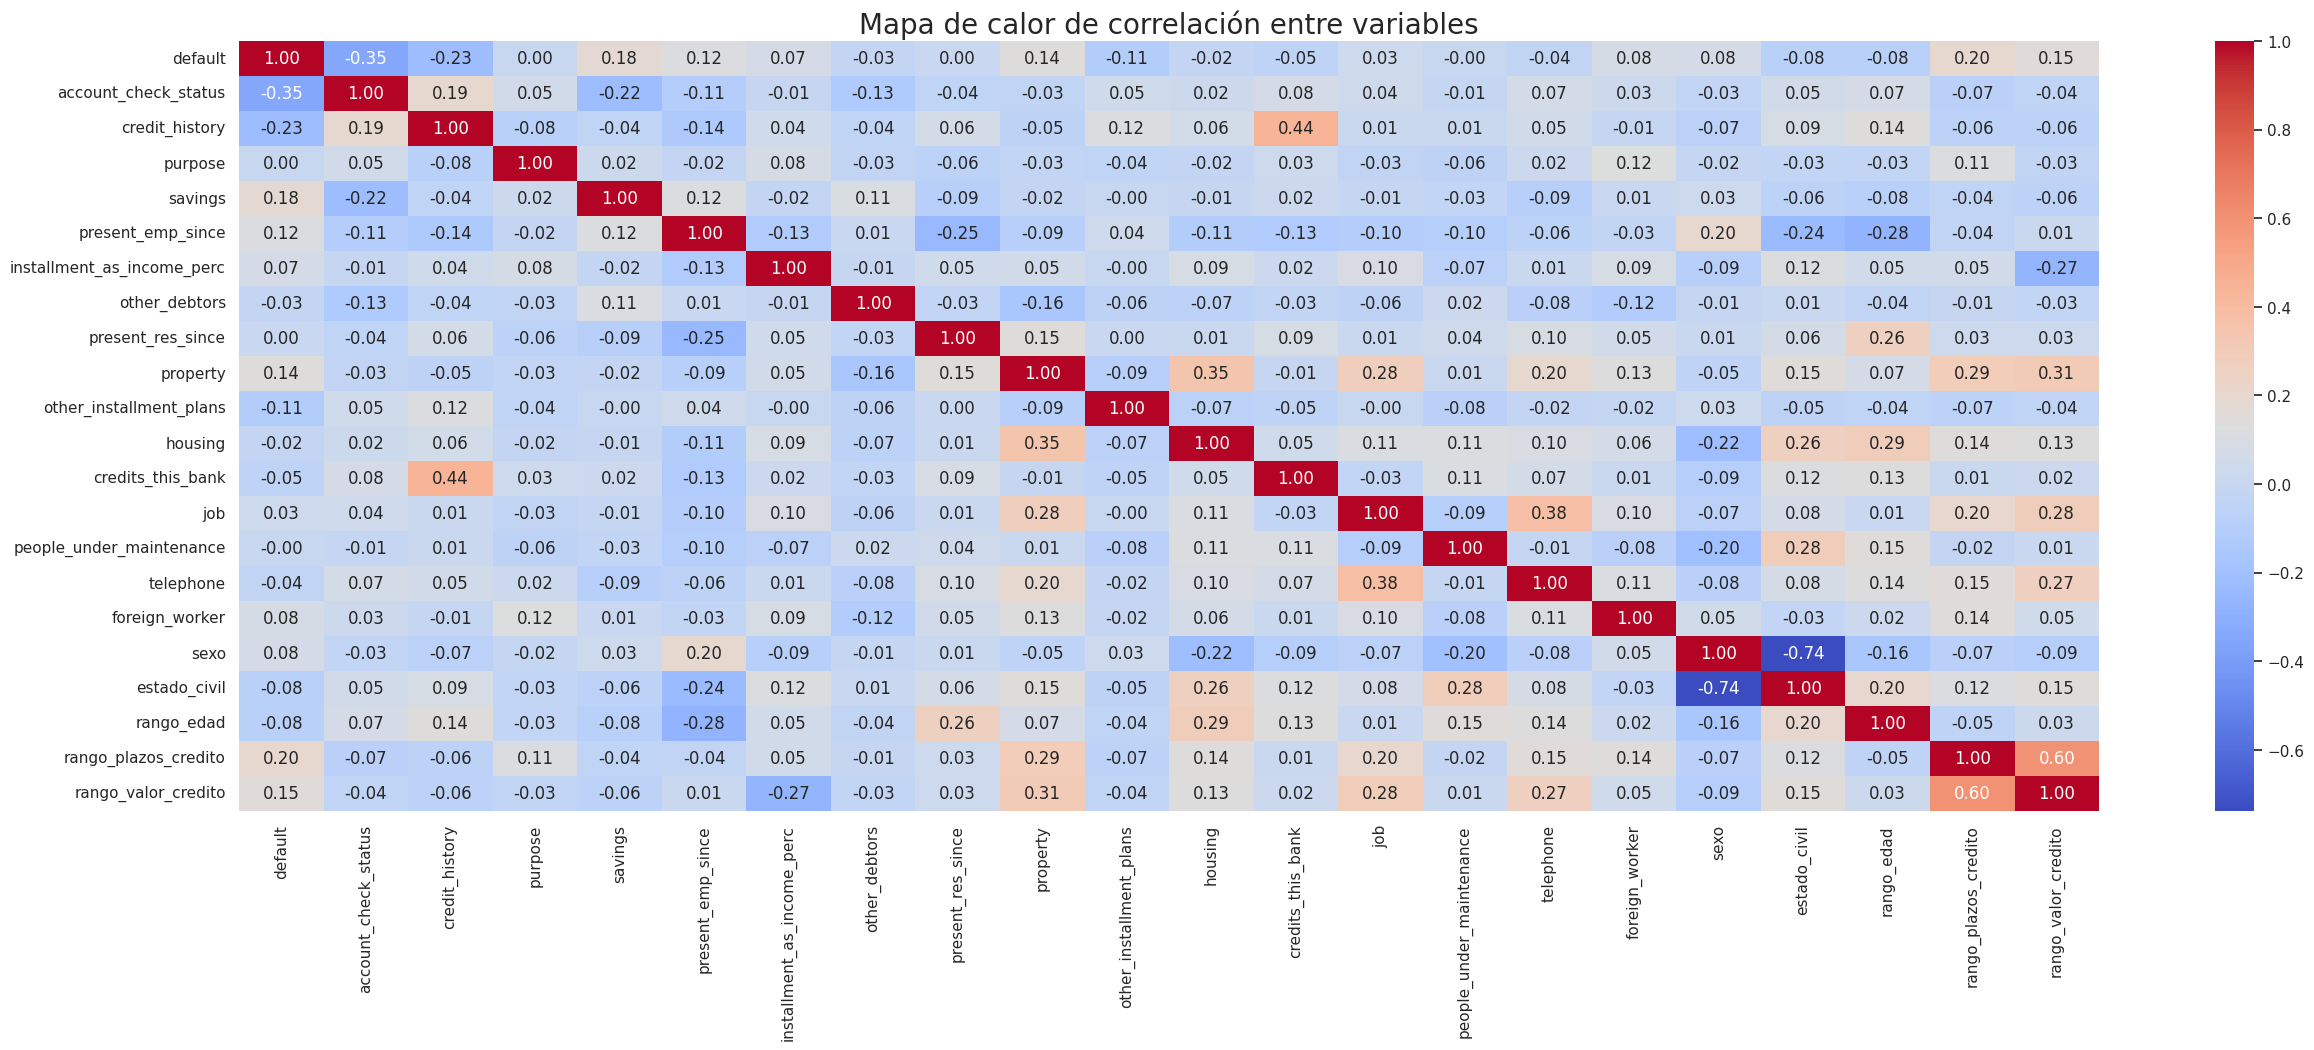

In [212]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Mapa de calor de correlación entre variables", fontsize=20)
plt.show()


- El 69% de los solicitantes de crédito son varones frente a un 31% de mujeres
- El 54% de los solicitantes están solteros y el 45% en pareja
- El 41% de los solicitantes quieren un plan de pago de 12 a 23 meses. Un 35% quieren un plan de pago menor de un año.
- El 41% de los solicitantes se encuentra en el rango etario de 18 a 29 años. Le sigue un 31% de personas entre 30 y 39 años. Un 16% de personas entre 40 y 49 años. Y un 11% de personas mayores de 50 años.
- El 70% de los solicitantes son good customers frente a un 30% de bad customers.
- El 28% de los creditos son solicitados para la compra de electrodomesticos, un 23% para adquirir un auto nuevo, un 18% para la compra de una radio/television y un 10% para la compra de un auto usado.
- El mapa de calor muestra una correlación negativa entre el estado civil y el sexo

In [213]:
import statsmodels.api as sm

#Un ejemplo de regresion lineal
def test_regresion(df_banco, sexo, default):
    X = sm.add_constant(df_banco[sexo])
    y = df_banco[default]
    model = sm.OLS(y, X).fit()

    print(model.summary())


test_regresion(df_banco, 'sexo', 'default')

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.720
Date:                Thu, 29 Feb 2024   Prob (F-statistic):             0.0170
Time:                        14:10:46   Log-Likelihood:                -635.76
No. Observations:                1000   AIC:                             1276.
Df Residuals:                     998   BIC:                             1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2768      0.017     15.897      0.0

Si bien el P (0.017) indica que la variable sexo es estadística significativa, el modelo de regresión lineal solo explica un 0.6% de la variabilidad de "default" en función del sexo. La regresion deberia ser enriquecida con otras variables.

El valor de 2.04 de Durbin- Watson :indica que la distribucion de los datos es lineal

In [214]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

def breusch_pagan_test(df, feature, target):
    X = sm.add_constant(df[feature])
    y = df[target]
    model = sm.OLS(y, X).fit()

    _, p_value, _, _ = het_breuschpagan(model.resid, X)

    print("Resultado de la Prueba de Breusch-Pagan:")
    print("Estadístico LM:", p_value)
    print("Valor p:", p_value)
    if p_value < 0.05:
        print("Se rechaza la hipótesis nula, lo que sugiere heterocedasticidad.")
    else:
        print("No se rechaza la hipótesis nula, lo que sugiere homocedasticidad.")

def white_test(df, feature, target):
    X = sm.add_constant(df[feature])
    y = df[target]
    model = sm.OLS(y, X).fit()

    _, p_value, _, _ = het_white(model.resid, X)

    print("\nResultado de la Prueba de White:")
    print("Estadístico LM:", p_value)
    print("Valor p:", p_value)
    if p_value < 0.05:
        print("Se rechaza la hipótesis nula, lo que sugiere heterocedasticidad.")
    else:
        print("No se rechaza la hipótesis nula, lo que sugiere homocedasticidad.")

breusch_pagan_test(df_banco, 'sexo', 'default')
white_test(df_banco, 'sexo', 'default')

Resultado de la Prueba de Breusch-Pagan:
Estadístico LM: 0.027285596098475515
Valor p: 0.027285596098475515
Se rechaza la hipótesis nula, lo que sugiere heterocedasticidad.

Resultado de la Prueba de White:
Estadístico LM: 0.0272855960984826
Valor p: 0.0272855960984826
Se rechaza la hipótesis nula, lo que sugiere heterocedasticidad.


Si bien el modelo de regresión sigue siendo válido a pesar de la heterocedasticidad, sería conveniente realizar ajustes en el modelo para mejores predicciones.

# Construcción de modelos de Machine Learning



In [215]:
#Importar libraries de modelos de clasificacion
from sklearn.model_selection import train_test_split #divide bases en datos de entrenamiento (aprender) y prueba (pronosticar)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score,recall_score, f1_score #Metricas de evaluacion de los modelos utilizados

Los modelos de ML se dividen en 3 grupos: regresion, clasificacion y clusterizacion.

Problema del negocio: ¿El cliente es apto para otorgarle un préstamo?

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


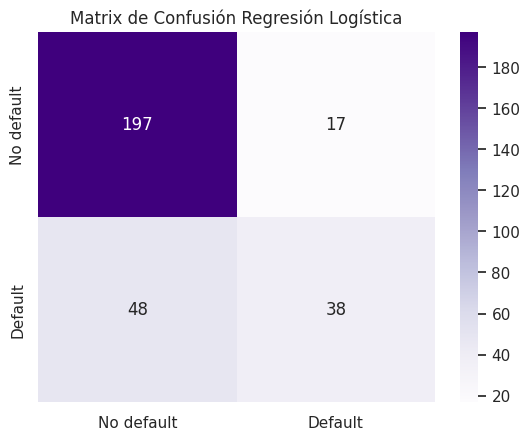

Model: Regresión Logística
Accuracy: 0.7833333333333333
Precision: 0.6909090909090909
Recall: 0.4418604651162791
F1-Score: 0.5390070921985816
AUC-ROC: 0.7999347967833079



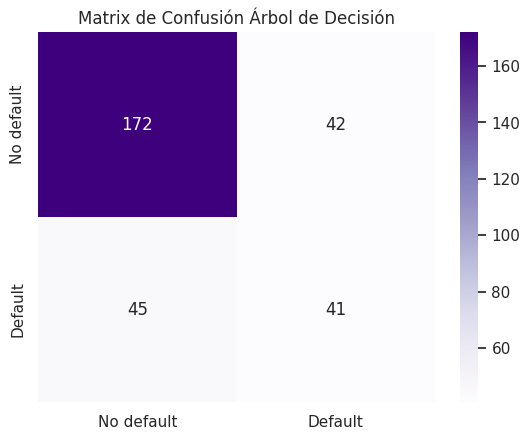

Model: Árbol de Decisión
Accuracy: 0.71
Precision: 0.4939759036144578
Recall: 0.47674418604651164
F1-Score: 0.48520710059171596
AUC-ROC: 0.6402412519017605



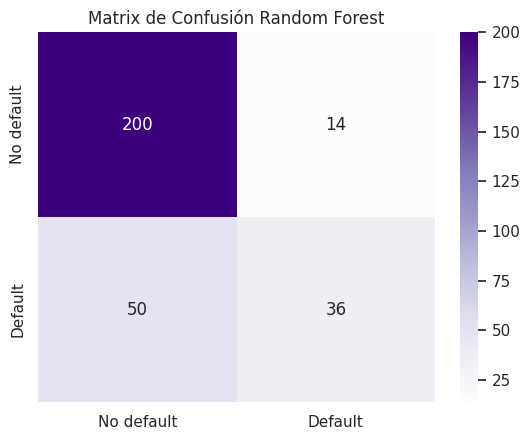

Model: Random Forest
Accuracy: 0.7866666666666666
Precision: 0.72
Recall: 0.4186046511627907
F1-Score: 0.5294117647058824
AUC-ROC: 0.7994186046511627



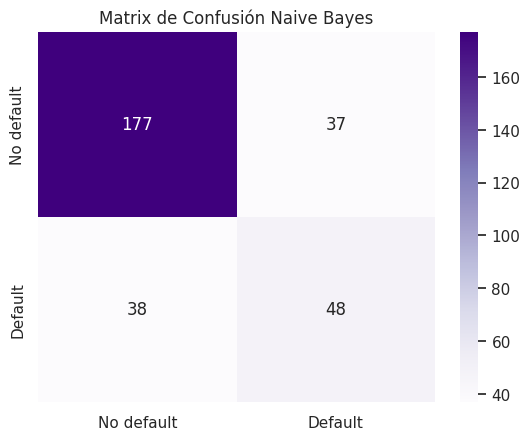

Model: Naive Bayes
Accuracy: 0.75
Precision: 0.5647058823529412
Recall: 0.5581395348837209
F1-Score: 0.5614035087719299
AUC-ROC: 0.7811888719843512



In [216]:
!pip install sklearn.metrics
from sklearn import metrics

def crea_modelos():
    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)

        conf_matrix = metrics.confusion_matrix(test_y, predictions)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
        plt.title(f'Matrix de Confusión {name}')
        plt.show()

        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        print(f'Model: {name}')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1-Score: {f1}')
        print(f'AUC-ROC: {roc_auc}\n')

crea_modelos()

**GLOSARIO**

**Accuracy:** Predicciones correctas dividido el número total de predicciones.

**Precisión:** Verdaderos positivos dividido el total de instancias clasificas como positivas. Hay que prestarle atención cuando queremos minimizar los falsos positivos (Error de tipo 1)

**Recall:** Es la fracción de instancias positivas que el modelo predijo de forma correcta. Es la cantidad de verdaderos positivos dividido el total de instancias verdaderamente positivas. Es importante cuando queremos minimizar los falsos negativos (Error de tipo 2)

**F1-Score:** Combinación de la precisión y el recall en un solo valor.

**AUC-ROC:** Es el área bajo la curva ROC. La curva ROC representa graficamente la tasa de verdaderos positivos frente a la tasa de falsos positivos. Proporciona una medida de la capacidad de discriminación del modelo. Los valores cercanos a 1 indican un buen rendimiento del modelo.

# ¿Cuál de estos modelos seleccionarias y por qué?

Tras realizar varias pruebas, el modelo que muestra mejores resultados al analizar las matrices de confusión es el modelo Random Forest. Teniendo la menor cantidad de falsos positivos, es decir, nos permite evitar el error de tipo 1. A su vez, es el modelo que ha detectado mayor cantidad de verdaderos positivos.


# ¿Qué es una matrix de confusión?

Es una tabla utilizada en el analisis de clasificación para evalular el rendimiento de un modelo. Nos muestra la cantidad de predicciones correctas e incorrectas realizadas por nuestro modelo en comparación con los valores reales en el conjunto de datos de prueba. Es decir, permite ver el comportamiento del clasificar con base en los errores de tipo 1 y tipo 2.

Las celdas típicas en una matriz de confusión incluyen:

Verdaderos positivos (TP): Instancias positivas que fueron correctamente clasificadas como positivas.

Verdaderos negativos (TN): Instancias negativas que fueron correctamente clasificadas como negativas.

Falsos positivos (FP): Instancias negativas que fueron incorrectamente clasificadas como positivas.

Falsos negativos (FN): Instancias positivas que fueron incorrectamente clasificadas como negativas.


# Balanceando la variable target con SMOTE (Synthetic Minority Over-sampling Technique)

In [217]:
from imblearn.over_sampling import SMOTE

def crea_modelos2():
    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
    # Listas
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        # Aplicar SMOTE en los datos de entrenamiento
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

        model.fit(train_x_resampled, train_y_resampled)  # Entrenamiento con datos balanceados
        predictions = model.predict(test_x)  # Predicciones en datos de prueba
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        # Incorporar métricas a la lista de resultados
        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

In [218]:
crea_modelos2()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.75
0.5533980582524272
0.6627906976744186
0.603174603174603
0.8053683981743099


Árbol de Decisión
0.71
0.4948453608247423
0.5581395348837209
0.5245901639344261
0.6645837861334493


Random Forest
0.7533333333333333
0.573170731707317
0.5465116279069767
0.5595238095238095
0.7769506628993696


Naive Bayes
0.7666666666666667
0.5714285714285714
0.7441860465116279
0.6464646464646464
0.810856335579222




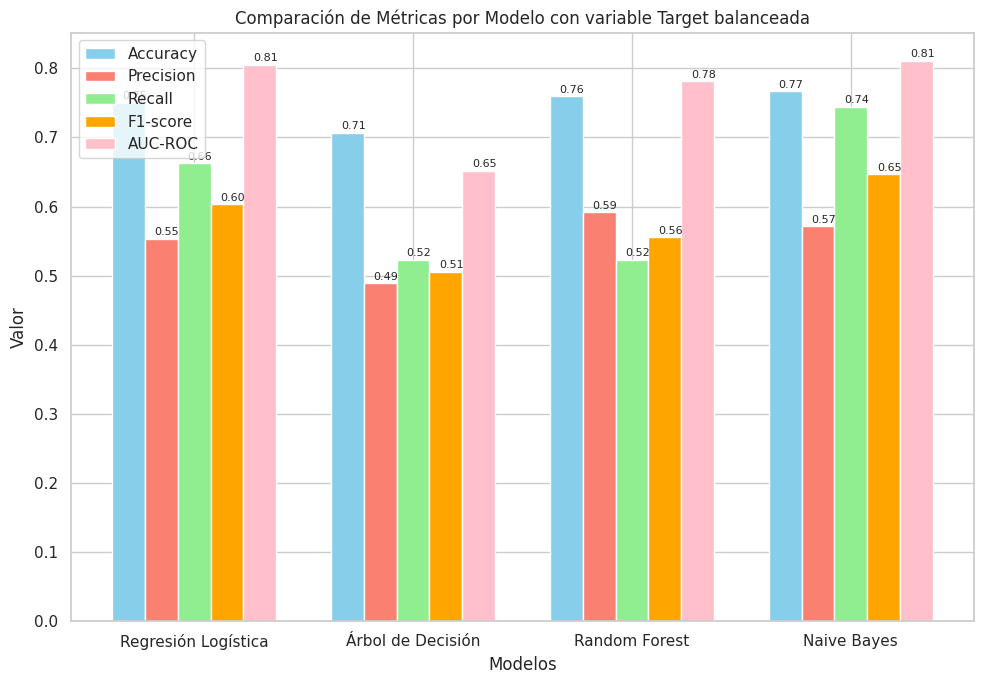

In [219]:
import numpy as np

crea_modelos2()

# Definir métricas y modelos
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
modelos = resultados['Model']
n_modelos = len(modelos)
ind = np.arange(n_modelos)  # Posiciones de las barras

# Crear gráfico
plt.figure(figsize=(10, 7))

# Anchura de las barras
bar_width = 0.15

# Definir colores para las barras
colores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'pink']

# Dibujar barras para cada métrica
for i, metrica in enumerate(metricas):
    plt.bar(ind + i * bar_width, resultados[metrica], bar_width, label=metrica, color=colores[i])

# Agregar valores de métricas debajo del gráfico
for i, modelo in enumerate(modelos):
    for j, metrica in enumerate(metricas):
        valor = resultados[metrica][i]
        plt.text(ind[i] + j * bar_width - 0.03, valor + 0.005, f'{valor:.2f}', fontsize=8)

# Configuraciones adicionales
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de Métricas por Modelo con variable Target balanceada')
plt.xticks(ind + bar_width * (len(metricas) - 1) / 2, modelos)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


Tras generar una muestra sintética para equilibrar la variable target (default), el modelo de Naive Bayes ha mostrado un valor del 77% de accuracy así como también un buen nivel de recall (74%), es decir, el modelo pudo predecir instancias positivas de forma correcta. Sin embargo, su precisión es del 57% (o un poquito más) lo cual no es un valor que sea significativo o haga la diferencia para la detección del error de tipo 1 pero fue el modelo que mejor desempeño tuvo en este indicador. Si analizamos el F1-Score (65%), el modelo Naive Bayes muestra un mayor nivel de balance entre precisión y recall.

# Selección de algunas variables y reevaluación de los modelos

In [220]:
df_banco2 = df_banco.loc[:, ['default', 'rango_plazos_credito','account_check_status','credit_history','savings','sexo','estado_civil']]
df_banco2.sample(6)

,default,rango_plazos_credito,account_check_status,credit_history,savings,sexo,estado_civil
851,0,2,4,5,1,0,1
234,0,1,4,5,5,0,1
181,1,3,2,4,5,0,0
203,1,1,1,3,5,0,0
26,0,1,4,1,5,0,0
724,1,3,4,3,5,1,0


In [221]:
# Incorporación de los demás modelos
def crea_modelos3():
    global df_banco, resultados
    df_banco2 = df_banco.loc[:, ['default', 'rango_plazos_credito', 'account_check_status', 'credit_history', 'savings', 'sexo', 'estado_civil']]
    y = df_banco2['default']
    x = df_banco2.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }
    # Listas
    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)  # Entrenamiento
        predictions = model.predict(test_x)  # Incorporación de métricas
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)  # Incorporación de las métricas a la lista
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

crea_modelos3()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')


Regresión Logística
0.78
0.7
0.4069767441860465
0.5147058823529412
0.7859432732014779


Árbol de Decisión
0.6666666666666666
0.38333333333333336
0.26744186046511625
0.3150684931506849
0.6173657900456423


Random Forest
0.6833333333333333
0.43661971830985913
0.36046511627906974
0.3949044585987261
0.6929471853944793


Naive Bayes
0.79
0.6619718309859155
0.5465116279069767
0.5987261146496815
0.7896381221473593




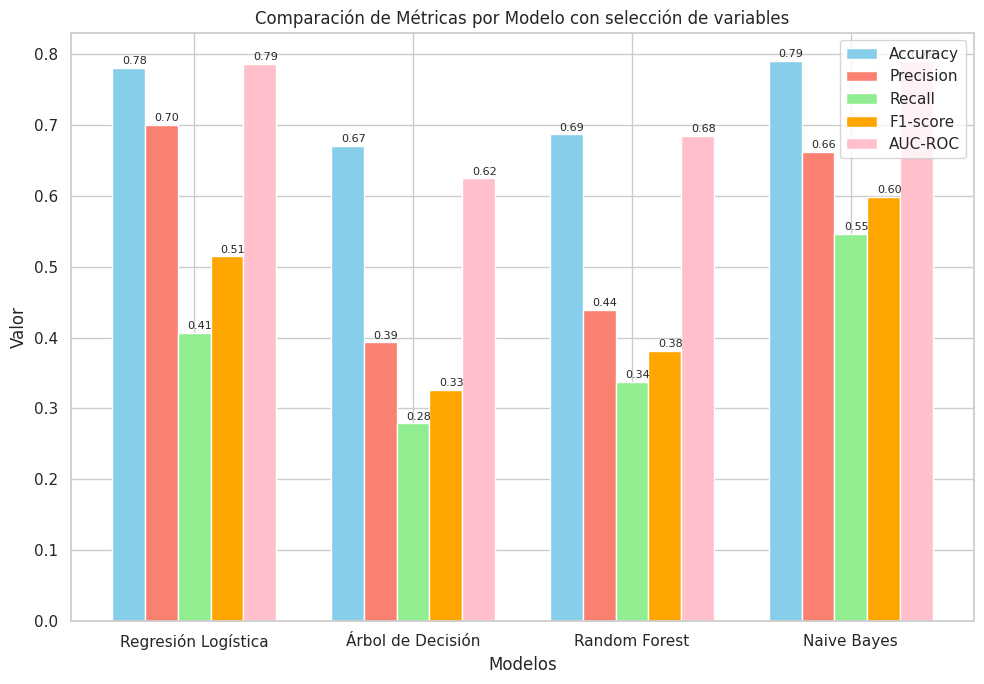

In [222]:
import numpy as np

crea_modelos3()

metricas = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
modelos = resultados['Model']
n_modelos = len(modelos)
ind = np.arange(n_modelos)  # Posiciones de las barras

# Crear gráfico
plt.figure(figsize=(10, 7))

# Anchura de las barras
bar_width = 0.15

# Definir colores para las barras
colores = ['skyblue', 'salmon', 'lightgreen', 'orange', 'pink']

# Dibujar barras para cada métrica
for i, metrica in enumerate(metricas):
    plt.bar(ind + i * bar_width, resultados[metrica], bar_width, label=metrica, color=colores[i])

# Agregar valores de métricas debajo del gráfico
for i, modelo in enumerate(modelos):
    for j, metrica in enumerate(metricas):
        valor = resultados[metrica][i]
        plt.text(ind[i] + j * bar_width - 0.03, valor + 0.005, f'{valor:.2f}', fontsize=8)

# Configuraciones adicionales
plt.xlabel('Modelos')
plt.ylabel('Valor')
plt.title('Comparación de Métricas por Modelo con selección de variables')
plt.xticks(ind + bar_width * (len(metricas) - 1) / 2, modelos)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()
